In [2]:
import pandas as pd
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Charger le dataset
df = pd.read_csv("train.csv")
nlp = spacy.load('en_core_web_sm')

# Add custom stopwords
custom_stopwords = set(["custom", "stopwords", "list"])  # Add your custom stopwords
STOP_WORDS = STOP_WORDS.union(custom_stopwords)

In [20]:

def reduce_dataset(input_file, output_file, sample_size):
    # Charger le jeu de données original à partir du fichier CSV
    data = pd.read_csv(input_file)

    # Réduire le nombre de lignes en échantillonnant aléatoirement un sous-ensemble de données
    sampled_data = data.sample(n=sample_size, random_state=42)

    # Enregistrer le sous-ensemble de données réduit dans un nouveau fichier CSV
    sampled_data.to_csv(output_file, index=False)

    print(f"Le nouveau jeu de données avec {sample_size} lignes a été enregistré dans {output_file}")

# Utilisation de la fonction pour réduire le nombre de lignes
input_file = "train.csv"
output_file = "test.csv"
sample_size = 30000  



In [21]:
reduce_dataset(input_file, output_file, sample_size)


Le nouveau jeu de données avec 30000 lignes a été enregistré dans test.csv


In [22]:
df_test=pd.read_csv('test.csv')
df_test

,Y,text
0,1,finally made a significant breakthrough with a...
1,1,school was great today keepin my ambition and ...
2,1,swedish high school love ya ll xoxo matilda
3,0,only if we had actually done it
4,1,dairy queen amp amp x
...,...,...
29995,0,lolly hugs are you alright i wanted to text yo...
29996,0,holy shit i hope those two have a sense of hum...
29997,1,thanks
29998,0,why


In [23]:
# Function for text processing with spaCy
def preprocess_text_spacy(text):
    doc = nlp(text)
    
    # Tokenization, lemmatization, and removing stopwords and short tokens
    tokens = [token.lemma_.lower() for token in doc if token.text.lower() not in STOP_WORDS and len(token.text) > 2]
    
    return ' '.join(tokens)


In [27]:
# Apply the function to the 'text' column
df['processed_text_spacy'] = df_test['text'].apply(preprocess_text_spacy)
df['processed_text_spacy']

0          finally make significant breakthrough with sca...
1          school be great today keepin ambition and focu...
2                      swedish high school love xoxo matilda
3                                      only have actually do
4                                        dairy queen amp amp
                                 ...                        
1046338                                                  NaN
1046339                                                  NaN
1046340                                                  NaN
1046341                                                  NaN
1046342                                                  NaN
Name: processed_text_spacy, Length: 1046343, dtype: object

In [29]:
df = df.dropna(subset=['processed_text_spacy'])

In [30]:
# Reconstruct the corpus
corpus_spacy = ' '.join(df['processed_text_spacy'])
corpus_spacy


'finally make significant breakthrough with scaling issue be have some our site school be great today keepin ambition and focus sweet dream tweet heart xoxo swedish high school love xoxo matilda only have actually do dairy queen amp amp sorry miss you business business fergie texte she there thursday and now can seem find all the people follow the mixero contact search that biggie ugh last dayy her boo do like its okay tho ill get over be mean anyway cousin fandibulous that be cousin need add he myspace go take doggie get her staple remove wonder where should for lunch only get like minute today sighz lol know should try cheer you but loudofficeneighbor deserve what come he haha omg miami fri there george lee but with the kansas cummann today go fun go spend all day with bestie whhohoo hello paradise hehe one place would love visit fresh from amsterdam chocolate pretzel awesome like the city itself need holiday more love couch surfing get ready for all day date tomorrow out london have

In [31]:
# Number of unique tokens
unique_tokens_spacy = len(set(corpus_spacy.split()))
print("Nombre de tokens uniques avec spaCy :", unique_tokens_spacy)

Nombre de tokens uniques avec spaCy : 23449


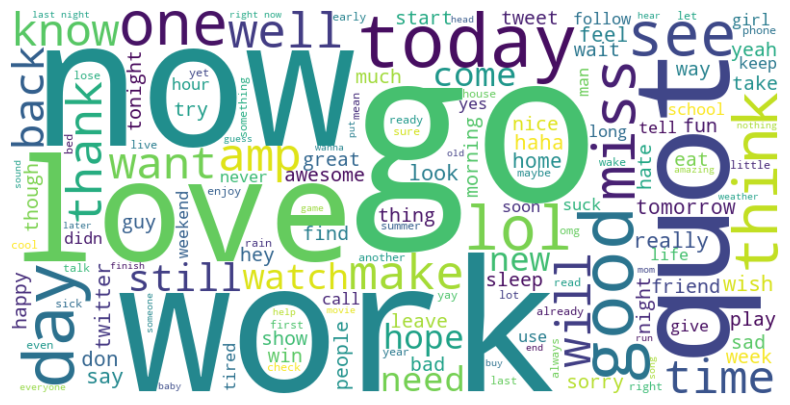

In [32]:
# Visualize the most frequent tokens with a WordCloud
wordcloud_spacy = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(corpus_spacy)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spacy, interpolation='bilinear')
plt.axis('off')
plt.show()



In [33]:
# Use the processed column with spaCy
df['new_text_spacy'] = df['processed_text_spacy']
df['new_text_spacy']

0        finally make significant breakthrough with sca...
1        school be great today keepin ambition and focu...
2                    swedish high school love xoxo matilda
3                                    only have actually do
4                                      dairy queen amp amp
                               ...                        
29995    lolly hug be you alright want text you but bre...
29996    holy shit hope those two have sense humor dead...
29997                                                thank
29998                                                  why
29999                                           one online
Name: new_text_spacy, Length: 30000, dtype: object